In [15]:
import requests
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# scraped from following url:           https://forum.effectivealtruism.org/tags/all
# using this regex on each html list:   ">([a-zA-Z\s]*)<

# Note that not all categories on the webpage are included here. pull requests to add missing welcome.

global_poverty = ["Aid and paternalism",
"Burden of disease",
"Cash transfers",
"Deworming",
"Economic growth",
"Education",
"Family planning",
"Foreign aid",
"Foreign aid skepticism",
"Global health and wellbeing",
"Global poverty",
"Immigration reform",
"Malaria",
"Micronutrient programs",
"Research into neglected tropical diseases",
"Smallpox Eradication Programme",
"Tobacco control",
"Universal basic income"]

animal_welfare = ["Animal product alternatives",
"Crustacean welfare",
"Cultured meat",
"Dietary change",
"Farmed animal welfare",
"Fish welfare",
"Invertebrate welfare",
"Logic of the larder",
"Speciesism",
"Welfare biology",
"Wild animal welfare"]

ai = ["AI alignment",
"AI boxing",
"AI ethics",
"AI forecasting",
"AI race",
"AI safety",
"AI skepticism",
"AI takeoff",
"AI winter",
"Alignment tax",
"Anthropic capture",
"Artificial intelligence",
"Artificial sentience",
"Basic AI drive",
"Capability control method",
"Collective superintelligence",
"Comprehensive AI Services",
"Computation hazard",
"Economics of artificial intelligence",
"Governance of artificial intelligence",
"Indirect normativity",
"Infrastructure profusion",
"Instrumental convergence thesis",
"Intelligence explosion",
"Malignant AI failure mode",
"Mind crime",
"Motivation selection method",
"Oracle AI",
"Orthogonality thesis",
"Perverse instantiation",
"Quality superintelligence",
"Sovereign AI",
"Speed superintelligence",
"Superintelligence",
"Tool AI",
"Whole brain emulation"]

catastrophic_risks = ["Asteroids",
"Biosecurity",
"Biosurveillance",
"Civilizational collapse",
"Cuban Missile Crisis",
"Climate change",
"Climate engineering",
"Conservation",
"Dystopia",
"Existential risks from fundamental physics research",
"Geomagnetic storms",
"Great power conflict",
"Human extinction",
"Manhattan Project",
"Nuclear disarmament movement",
"Nuclear security",
"Nuclear warfare",
"Nuclear winter",
"Pandemic preparedness",
"Terrorism",
"Trinity",
"Supervolcano",
"Weapons of mass destruction"]

building_effective_altruism = [
"Altruistic motivation",
"Building effective altruism",
"Community",
"Competitive debating",
"Consultancy",
"Effective altruism education",
"Effective altruism groups",
"Effective altruism in the media",
"Effective altruism messaging",
"Effective altruism outreach in schools",
"Event strategy",
"Field building",
"Fundraising",
"Global outreach",
"Moral advocacy",
"Movement collapse",
"Network building",
"Public giving",
"Request for proposal",
"Scalably using labour",
"Teaching materials",
"Value drift",
"Value of movement growth"]

other_causes = [
"Aging research",
"Air pollution",
"Armed conflict",
"Autonomous weapon",
"Cause candidates",
"Cause X",
"Cluster headache",
"Cognitive enhancement",
"Criminal justice reform",
"Electoral reform",
"Global priorities research",
"Land use reform",
"Local priorities research",
"Mental health",
"Moral circle expansion",
"Research",
"Risks from malevolent actors",
"Space colonization"]


moral_philosophy = [
    "Animal cognition",
    "Animal sentience",
    "Applied ethics",
    "Astronomical waste",
    "Axiology",
    "Bioethics",
    "Classical utilitarianism",
    "Cluelessness",
    "Consciousness research",
    "Consequentialism",
    "Cosmopolitanism",
    "Demandingness of morality",
    "Deontology",
    "Ethics of existential risk",
    "Ethics of personal consumption",
    "Future of humanity",
    "Hedonism",
    "Hedonium",
    "Infinite ethics",
    "Introspective hedonism",
    "Intuition of neutrality",
    "Longtermism",
    "Metaethics",
    "Moral offsetting",
    "Moral patienthood",
    "Moral uncertainty",
    "Moral weight",
    "Negative utilitarianism",
    "Normative ethics",
    "Normative uncertainty",
    "Other moral theories",
    "Pain and suffering",
    "Patient altruism",
    "Personal identity",
    "Philosophy of mind",
    "Population ethics",
    "Prioritarianism",
    "Sentience",
    "Subjective wellbeing",
    "Utilitarianism",
    "Valence",
    "Virtue ethics",
    "Welfarism",
    "Wellbeing",
]

long_term_risks_and_flourising = [
    "Alternative food",
    "Anthropogenic existential risk",
    "Anthropic shadow",
    "Compound existential risk",
    "Decisive strategic advantage",
    "Defense in depth",
    "Differential progress",
    "Estimation of existential risk",
    "Existential catastrophe",
    "Existential risk",
    "Existential risk factor",
    "Existential security",
    "Fermi paradox",
    "Flourishing futures",
    "Global catastrophic risk",
    "Global catastrophic biological risk",
    "Great Filter",
    "Hellish existential catastrophe",
    "Hinge of history",
    "Institutions for future generations",
    "Long reflection",
    "Movement resilience",
    "Natural existential risk",
    "Singleton",
    "Speeding up development",
    "Technological completion conjecture",
    "Time of perils hypothesis",
    "Timing of existential risk mitigation",
    "Total existential risk",
    "Trajectory changes",
    "Transformative development",
    "Transhumanism",
    "Unknown existential risk",
    "Unprecedented risks",
    "Vulnerable world hypothesis",
    "Warning shot",
]


decision_theory_and_rationality = [
    "Acausal trade",
    "Alternatives to expected value theory",
    "Altruistic coordination",
    "Altruistic wager",
    "Anthropics",
    "Bayesian epistemology",
    "Cause neutrality",
    "Cause prioritization",
    "Cognitive bias",
    "Counterfactual reasoning",
    "Credal resilience",
    "Crucial consideration",
    "Debunking argument",
    "Decision theory",
    "Definition of effective altruism",
    "Disentanglement research",
    "Doomsday argument",
    "Epistemic deference",
    "Epistemology",
    "Evolution heuristic",
    "Expected value",
    "Fanaticism",
    "Fermi estimation",
    "Forecasting",
    "Game theory",
    "Ideological Turing test",
    "Information hazard",
    "Intervention evaluation",
    "Macrostrategy",
    "Marginal charity",
    "Measuring and comparing value",
    "Model uncertainty",
    "Models",
    "Moral cooperation",
    "Moral psychology",
    "Moral trade",
    "Prediction markets",
    "Principle of epistemic deference",
    "Psychology research",
    "Randomized controlled trials",
    "Research methods",
    "Reversal test",
    "Risk aversion",
    "Scope neglect",
    "Simulation argument",
    "Statistical methods",
    "Status quo bias",
    "Thinking at the margin",
    "Value of information",
]

economics_and_finance = [
    "Adjusted life year",
    "Blockchain",
    "Divestment",
    "Economics",
    "Impact investing",
    "International trade",
    "Macroeconomic policy",
    "Mechanism design",
    "Microfinance",
    "Public goods",
    "Welfare economics",
]

politics_policy_and_culture = [
"Ballot initiative",
"Corruption",
"Cultural evolution",
"Cultural lag",
"Cultural persistence",
"Democracy",
"Electoral politics",
"Global governance",
"International organization",
"International relations",
"Journalism",
"Law",
"Leadership",
"Misinformation",
"Peace and conflict studies",
"Polarity",
"Policy",
"Political polarization",
"Progress studies",
"Safeguarding liberal democracy",
"Social and intellectual movements",
"Space governance",
"Systemic change",
"Surveillance",
"Totalitarianism",
]

effective_giving = [
    "Cash transfers",
    "Certificate of impact",
    "Charity evaluation",
    "Constraints on effective altruism",
    "Diminishing returns",
    "Donation choice",
    "Donation matching",
    "Donation pledge",
    "Donation writeup",
    "Donor lotteries",
    "Effective altruism funding",
    "Giving and happiness",
    "Impact assessment",
    "Importance",
    "Interpersonal comparisons of wellbeing",
    "Investing",
    "ITN framework",
    "Market efficiency of philanthropy",
    "Markets for altruism",
    "Neglectedness",
    "Org strategy",
    "Philanthropic coordination",
    "Philanthropic diversification",
    "Problem framework",
    "Room for more funding",
    "Socially responsible investing",
    "Temporal discounting",
    "Timing of philanthropy",
    "Tractability",
    "Volunteering",
    "Workplace activism",
]

career_choice = [
    "Academia",
    "Career advising",
    "Career capital",
    "Career choice",
    "Career framework",
    "Coaching",
    "Data science",
    "Earning to give",
    "Effective altruism hiring",
    "Entrepreneurship",
    "Expertise",
    "Independent research",
    "Job profile",
    "Job satisfaction",
    "Operations",
    "Personal fit",
    "Public interest technology",
    "Replaceability",
    "Research careers",
    "Research training programs",
    "Role impact",
    "Software engineering",
    "Supportive conditions",
]

other = [
    "Ambition",
    "Atomically precise manufacturing",
    "Biotechnology",
    "China",
    "Computational power of the human brain",
    "Computronium",
    "Corruption",
    "Cryonics",
    "European Union",
    "Extraterrestrial intelligence",
    "Fabianism",
    "Gene drives",
    "History",
    "India",
    "Information security",
    "Iterated embryo selection",
    "Kidney donation",
    "Life sciences",
    "Medicine",
    "North Korea",
    "Obituary",
    "Philippines",
    "Philosophic Radicals",
    "Rationality community",
    "Red teaming",
    "Religion",
    "Russia",
    "Scientific progress",
    "Semiconductors",
    "Ukraine",
    "United States politics",
    "Utilitarian Society",
    "Transparency",
]

criticism = [
    "Criticism of effective altruist causes",
    "Criticism of effective altruism",
    "Criticism of effective altruist organizations",
]

tag_types = {
    "Cause Areas": {
        "Global Poverty": global_poverty,
        "Animal Welfare": animal_welfare,
        "AI": ai,
        "Catastrophic Risks": catastrophic_risks,
        "Building Effective Altruism": building_effective_altruism,
        "other causes": other_causes
    },
    "Other concepts": {
        "Moral Philosophy": moral_philosophy,
        "long_term_risks_and_flourising": long_term_risks_and_flourising,
        "decision_theory_and_rationality": decision_theory_and_rationality,
        "economics_and_finance": economics_and_finance,
        "politics_policy_and_culture": politics_policy_and_culture,
        "effective_giving": effective_giving,
        "career_choice": career_choice,
        "other": other
    },
    "Meta + Commmunity": {
        "criticism": criticism,
    }
}

# Creating the dataset

In [ ]:
import requests
import numpy as np
import json
import pandas as pd
import tags
import matplotlib.pyplot as plt

query = """{
    posts(input: {
        terms: {
            limit: 1000
            offset: %s
            meta: null
        }
        }) {
        results {
            _id
            title slug pageUrl
            postedAt
            baseScore
            voteCount
            commentCount
            meta
            question
            url
            user {
            username
            slug
            }
            tags {
            name
            }
        }
    }
}"""

# make series of graphQL query and turn into dataframe
posts = pd.DataFrame()
url = 'https://forum.effectivealtruism.org/graphql'
offset = 0

for i in range(0, 10):
    offset_query = query % (offset)
    r = requests.post(url, json={'query': offset_query})
    json_data = json.loads(r.text)
    df_data = json_data['data']['posts']['results']
    posts = posts.append(pd.DataFrame(df_data))
    offset += 1000

posts = posts.reset_index(drop=True)

# clean up tags
def tag_cleaner(tag_list):
    tag_list = [tag['name'] for tag in tag_list]
    return tag_list
posts.tags = posts.tags.apply(lambda x: tag_cleaner(x))

# categorise post by tag category
## tag category could for example be "global poverty"
## Macro tag could for exmaple be "cause areas"

# Check if tags have at-least one element common
def tag_checker(x):
    tag_categories = []

    for tag_macro_category in tags.tag_types:
        for tag_type in tags.tag_types[tag_macro_category]:
            if (not set(tags.tag_types[tag_macro_category][tag_type]).isdisjoint(x)):
                tag_categories.append(tag_type)
    return tag_categories


posts['tag_categories'] = posts.tags.apply(lambda x: tag_checker(x))


# Get macro tags for each posts tag categories
def macro_tag_checker(x):
    macro_tag_categories = []
    for tag_macro_category in tags.tag_types:
        if (not set(tags.tag_types[tag_macro_category]).isdisjoint(x)):
            macro_tag_categories.append(tag_macro_category)
    return macro_tag_categories

posts['macro_tag_categories'] = posts.tag_categories.apply(lambda x: macro_tag_checker(x))


# format postedat to real dates

posts.postedAt = pd.to_datetime(posts.postedAt)

# Which cause areas get the most posts?

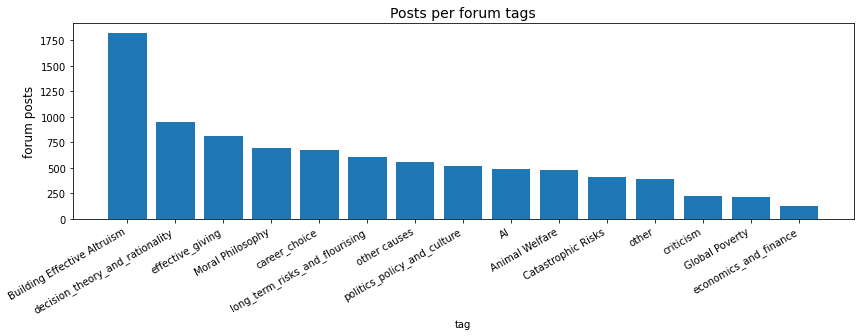

In [18]:
# taken from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

tags = to_1D(posts["tag_categories"]).value_counts().index
posts_per_tag = to_1D(posts["tag_categories"]).value_counts().values

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(tags,
        posts_per_tag)
ax.set_ylabel("forum posts", size = 12)
ax.set_xlabel("tag")
ax.set_title("Posts per forum tags", size = 14)
fig.autofmt_xdate()# Graph amount of posts with each tag

The first thing that stood out to me, is that there are many more posts on meta subjects such as community building and rationality, than there are posts about specific cause areas. This is maybe not that surprising, as many cause-area specific analyses and reports might be not be posted on the EA Forum, but instead on the websites of the organisations that produce them, whereas there is no better place to share work on community building than the EA forum.

In terms of cause-areas there have been roughly the same number of posts on each cause area (AI, animal welfare, catastrophic risks, and other causes) with the exception of global development which has about half. I think the most likely explanation as for why this is, is that EA global development reports are more likely to be solely published on the websites of the organisations that produce it.

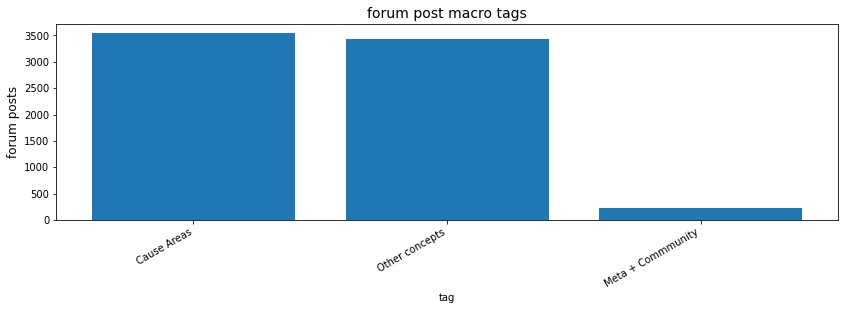

In [19]:
# Graph amount of posts with each macro tag

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(posts["macro_tag_categories"]).value_counts().index,
        to_1D(posts["macro_tag_categories"]).value_counts().values)
ax.set_ylabel("forum posts", size = 12)
ax.set_xlabel("tag")
ax.set_title("forum post macro tags", size = 14)
fig.autofmt_xdate()

There is roughly an equal split between posts on cause areas and other concepts.

# How has interest in cause-areas changed over time?
The EA Forum has exploded popularity in recent years, which I had expected would result noticable changes to what is posted on the forum. This seems not to be the case, and interest in each area (measured by amount of posts) has largely remained the same.

<AxesSubplot:title={'center':'Posts by tag by year'}, xlabel='Year', ylabel='Number of posts'>

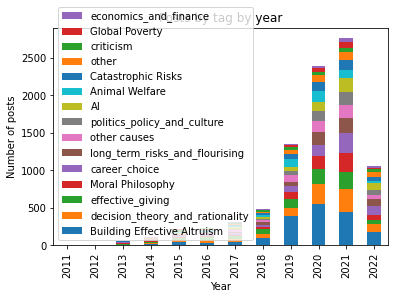

In [20]:
# bar plot with posts by year

# remove posts from before 2011 (post-humous posts)
posts = posts[~(posts['postedAt'].dt.year < 2011)]

# plot posts by year, each bar with tags stacked on top of each other with a different color
years = posts.postedAt.dt.year.value_counts().index
posts_per_year = pd.DataFrame(columns=tags)
for year in years:
    posts_this_year = posts[posts.postedAt.dt.year == year]
    tags_this_year = to_1D(posts_this_year["tag_categories"]).value_counts()
    tags_this_year = tags_this_year.rename(year)
    posts_per_year = posts_per_year.append(tags_this_year)

posts_per_year = posts_per_year.fillna(0)
posts_per_year.sort_index().plot(kind='bar', stacked=True, ylabel='Number of posts', xlabel='Year', legend='reverse', title='Posts by tag by year')

For easier comparison between the years, here is the same plot but normalized

<AxesSubplot:title={'center':'Normalized posts by tag by year'}, xlabel='Year', ylabel='Number of posts'>

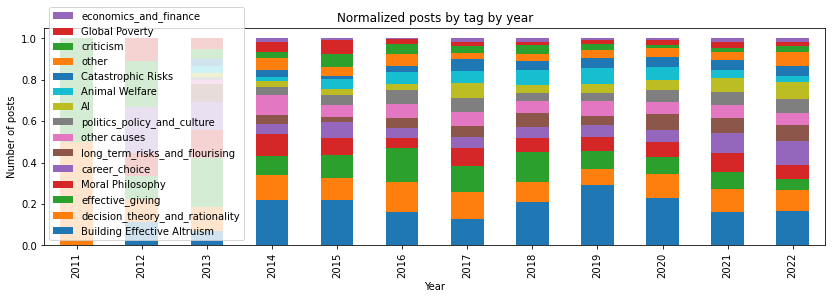

In [21]:
# normalized posts by year 

normalized_posts_per_year = posts_per_year.div(posts_per_year.sum(axis=1), axis=0)

normalized_posts_per_year.sort_index().plot(kind='bar', stacked=True, ylabel='Number of posts', xlabel='Year', figsize=(14,4), legend='reverse', title='Normalized posts by tag by year')

I was surprised to see how little change there have been in the make-up of posts over the years. Global development makes up a smaller percentage of the forum than it did in the early years, but has largely remained the same since 2016. The percentage of posts on animal welfare peaked in 2018-19 and has since decreased somewhat. Interest in AI looks to be going up, as are posts about career choices.

# Which posts get the most engagement?

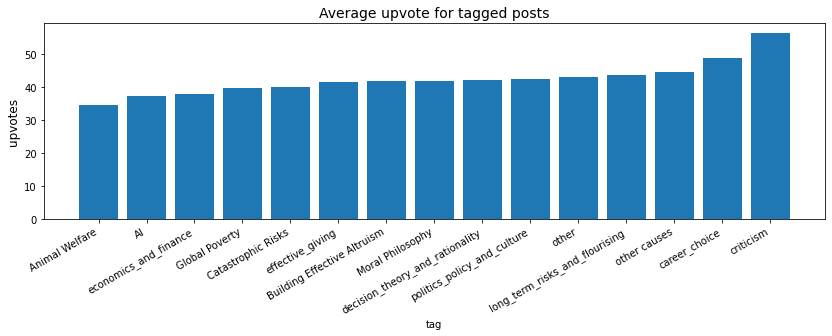

In [22]:
# Avg. upvotes per post

# taken from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

unique_tags = tags
tags_bool = boolean_df(posts["tag_categories"], unique_tags)

upvotes_per_tag = pd.Series(index=unique_tags, data=0)

# TODO: rewrite to list comprehension
for i in posts.iterrows():
    for tag in posts.loc[i[0]]['tag_categories']:
        upvotes_per_tag[tag] += posts.loc[i[0]]['baseScore']

fig, ax = plt.subplots(figsize = (14,4))
upvotes_per_post = upvotes_per_tag / posts_per_tag
ax.bar(upvotes_per_post.sort_values().index, upvotes_per_post.sort_values())
ax.set_ylabel("upvotes", size = 12)
ax.set_xlabel("tag")
ax.set_title("Average upvote for tagged posts", size = 14)
fig.autofmt_xdate()

Posts criticising EA are on average the most highly upvoted!

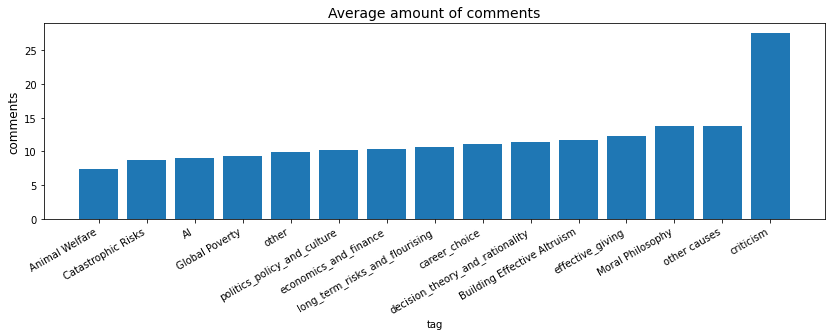

In [23]:
# Average comments on post

posts.commentCount = posts.commentCount.fillna(0)
comments_per_tag = pd.Series(index=unique_tags, data=0)

# TODO: rewrite to list comprehension
for i in posts.iterrows():
    for tag in posts.loc[i[0]]['tag_categories']:
        comments_per_tag[tag] += posts.loc[i[0]]['commentCount']

fig, ax = plt.subplots(figsize = (14,4))
comments_per_post = comments_per_tag / posts_per_tag
ax.bar(comments_per_post.sort_values().index, comments_per_post.sort_values())
ax.set_ylabel("comments", size = 12)
ax.set_xlabel("tag")
ax.set_title("Average amount of comments", size = 14)
fig.autofmt_xdate()

They are also by far the most highly commented posts!

Posts on cause-areas in turn tend to be the least upvoted with the fewest comments. My best guess as to why, is that it is a matter of engagability. It's difficult to provide much input to a deep-dive on some animal welfare issue without being  highly informed on the topic yourself. There is too much of an assymmetry between the knowledge of the author and average reader for these posts to generate a lot comments and debate.

I do think it's a shame that cause-specific posts seem to get less engagement and upvotes. Reading throrough analyses and deep-dives are often the posts I learn the most from, it's a shame that the readership for this content isn't higher.

# EA interests seem largely the same

My main takeway has been that there aren't any clear recent trends in EA I could deduce, at least based on how posts are tagged.

Fluctuation in the amount of posts on each cause-area is within what can be attributed to noise. The different major cause areas get roughly the same level of engagement on the forum. Many of the trends that can be seen, can likely be explained away by noting that the EA Forum is a flawed representation of EA's interests.

Are there any plots I didn't make you would like to see? If so, let me know and I'm probably happy to create them[2] :)